source: https://www.youtube.com/watch?v=iNlZ3IU5Ffw&list=PLv6Xu6O6acN7YCmPB3U3WubBP2KUY4bS4&index=2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
data_url = 'https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Data/force2020_data_unsupervised_learning.csv'
df = pd.read_csv(data_url)
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [11]:
df.dropna(inplace=True)
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [12]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [13]:
scaler = StandardScaler()

In [14]:
df[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690


In [15]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905,-5.217557e-16,7.453653e-17,-1.490731e-16,2.236096e-16,-6.708287e-16
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753,-2.609607e+00,-1.841459e+00,-2.705419e+00,-1.533222e+00,-2.161119e+00
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041,-6.605409e-01,-6.173961e-01,-7.239543e-01,-7.062589e-01,-1.034210e+00
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173,-3.601669e-01,5.459496e-02,3.758510e-01,-3.011687e-01,5.615503e-01
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302,9.535356e-01,5.509066e-01,7.131280e-01,4.260700e-01,8.170400e-01
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797,2.939426e+00,1.464037e+01,2.770744e+00,7.218123e+00,1.398372e+00


In [16]:
# Create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inerties = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inerties.append(kmeans.inertia_)

    # Generate the elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(means, inerties, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

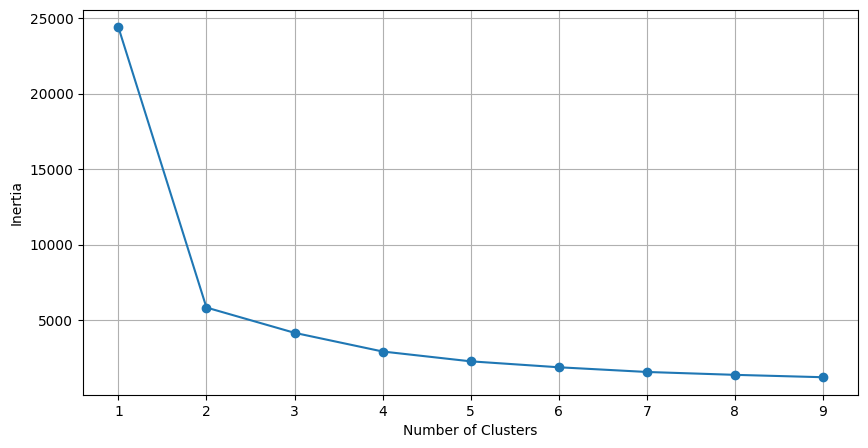

In [19]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 10)

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['NPHI_T', 'RHOB_T']])

KMeans(n_clusters=3)

In [24]:
df['kmeans_3'] = kmeans.labels_

In [25]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690,0


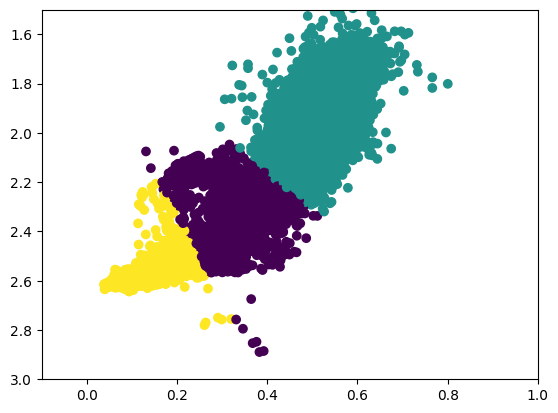

In [26]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

## Creating Multiple Clusters

In [27]:
for k in range(1,6):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['NPHI_T', 'RHOB_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

In [28]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1,0,1,0,3,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1,0,1,0,3,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1,0,1,0,3,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1,0,1,0,3,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0,0,0,1,1,4
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0,0,0,1,1,4
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0,0,0,1,1,4
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690,0,0,0,1,1,4


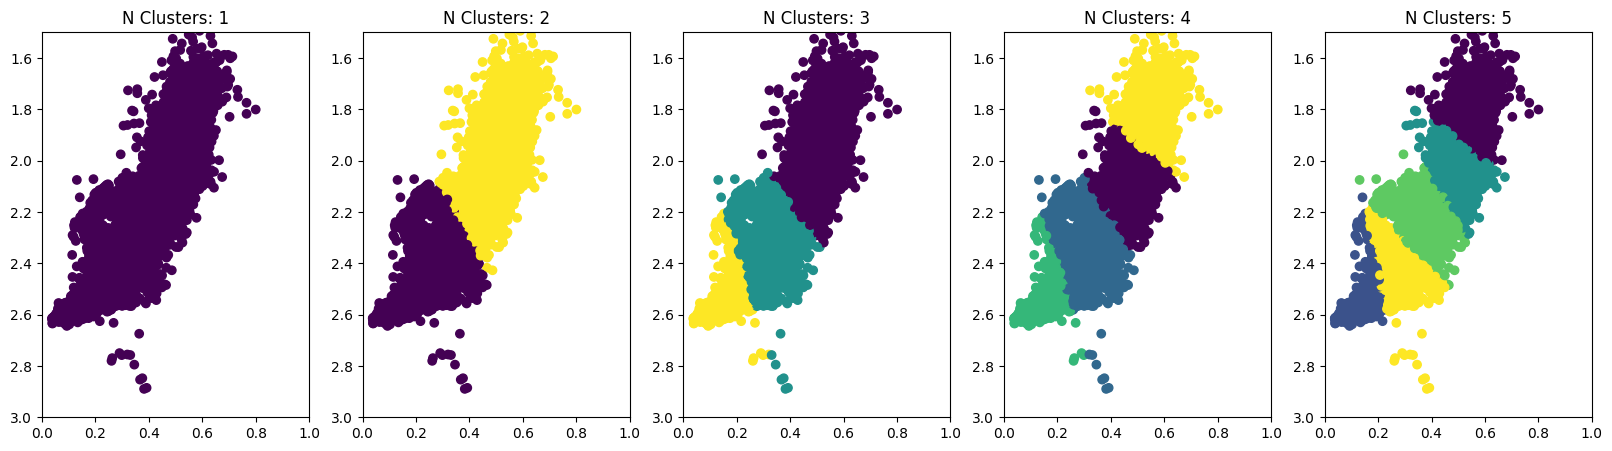

In [29]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 5))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c = df[f'KMeans_{i}'])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'N Clusters: {i}')